# **EMAIL SPAM DETACTION**
Email span detaction system is used to detact spam emails using machine learning technique.
where we have dataset cotaining lots of emails by extracting important words and use logistic regression we can classify 
wheater email is spam or ham

**Libraries**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp 
import re
import html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


### Project Pipeline
For any machine learning project it consist of three main phases as following :-
1. **Scoping :** List the problem description and project goals
2. **The Data :** Load, analyse and prepare the dataset for training
3. **The Model :** Create and train the model on the dataset

##  **1. Scoping and Defination**
Build a machine learning model that classifies incoming emails as spam or not spam (ham) with high accuracy, enabling automated filtering.


## **2 | The Data**
In this phase we will analyze and prepare the dataset before training by applying varoius steps as following :-
1. Data Loading
2. Data Visualization
3. Data Cleaning
4. Data Splitting

##### **1. Data Loading**
Load the dataset and show its info and statistics

In [ ]:
df = pd.read_csv('C:/Users/ADITYA/Downloads/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


##### **2. Data Visualization**

<Axes: xlabel='v1', ylabel='count'>

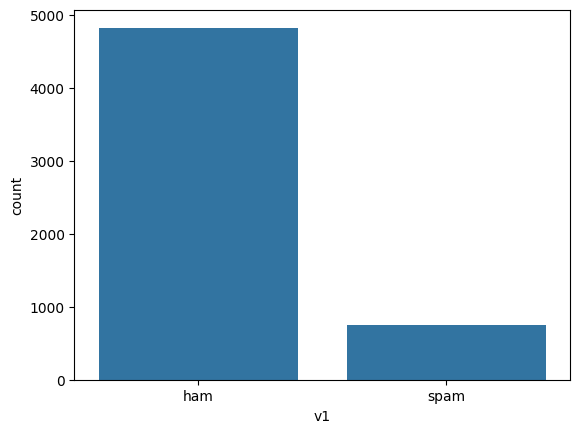

In [15]:
sns.countplot(x=df['v1'])

<Axes: ylabel='count'>

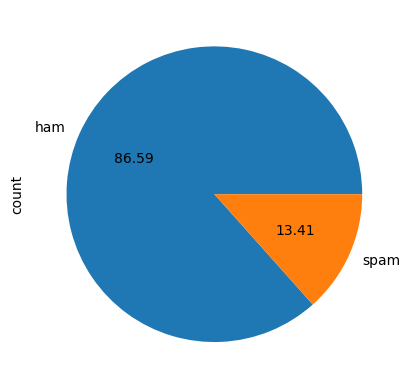

In [19]:
df['v1'].value_counts().plot(kind='pie',autopct='%.2f')

##### **3. Data Cleaning**

In [ ]:
X=df.iloc[:,1]
y=df.iloc[:,0]
y=y.map({'spam':1,'ham':0})
y


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [30]:


def clean_text(text):
    text = text.lower()  # Lowercase
    text = html.unescape(text)  # Convert HTML entities like &amp;
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

X_cleaned = X.apply(clean_text)
X_cleaned


0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in a wkly comp to win fa cup final ...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried contact u u ...
5568                 will ì_ b going to esplanade fr home
5569    pity was in mood for that soany other suggestions
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: v2, Length: 5572, dtype: object

##### **4. Model**

In [32]:
#convert text to numeric form so that it can understand by machine
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_cleaned)

In [33]:
#train_test split
X_train,X_test,y_train,y_test=train_test_split(X_vectorized,y,test_size=0.2,random_state=42)

In [34]:
#logistic regression
clf=LogisticRegression(class_weight='balanced')
#training model
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
#prdicting output
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9695067264573991